In [3]:
import os
from nbutils import add_project_path_to_sys_path


# Add project root to sys.path
add_project_path_to_sys_path()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import src.hdf5_ops as hdf5_ops
    import src.napp_plotlib as napp
    #import pipelines.metadata_revision as metadata_revision
    print("Imports successful!")
except ImportError as e:
    print(f"Import error: {e}")

Imports successful!


In [2]:
# Define h5 file name and make sure file is located at the current working dir
filename = '../input_files/FileList_v2.h5'

# Read h5 file into dataframe
dataframe = hdf5_ops.read_mtable_as_dataframe(filename)


dataframe['lastModifiedDatestr']
print(dataframe.columns)

dataframe.head()

Index(['xRayEkinRange_eV_1', 'xRayEkinRange_eV_2', 'scientaPassEnergy_eV',
       'scientaDwellTime_ms', 'regionName', 'scientaAcquisitionMode',
       'scientaEkinRange_eV_1', 'name', 'scientaEkinRange_eV_2',
       'scientaEkinStep_eV', 'scientaLensMode', 'scientaRegionIterations',
       'scientaSequenceIterations', 'spectrum_countsPerSecondRoh',
       'importDate', 'folder', 'analysisDir', 'sampleTemp_dC',
       'cellPressure_mbar', 'iceTemp_dC', 'smplX_mm', 'smplY_mm', 'smplZ_mm',
       'sealingTemp', 'lastModifiedDatestr', 'lastModifiedDatenum',
       'creationDate_1', 'peakPosition_1', 'peakPosition_2', 'peakPosition_3',
       'peakPosition_4', 'peakPosition_5', 'peakArea_1', 'peakArea_2',
       'peakArea_3', 'peakArea_4', 'creationDate_2', 'peakArea_5',
       'peakFWHM_1', 'peakFWHM_2', 'peakFWHM_3', 'peakFWHM_4', 'peakFWHM_5',
       'sample', 'logGenerateRange_1', 'logGenerateRange_2', 'logGenerateDate',
       'creationDate_3', 'logGenerateMode', 'logBackgroundRange_1

xRayEkinRange_eV_1 xRayEkinRange_eV_2 scientaPassEnergy_eV  \
MEAS_1               750.0              750.0                 50.0   
MEAS_10              750.0              750.0                 20.0   
MEAS_11              750.0              750.0                 20.0   
MEAS_12              750.0              750.0                 20.0   
MEAS_13              750.0              750.0                  NaN   

        scientaDwellTime_ms  regionName scientaAcquisitionMode  \
MEAS_1                520.0  Cl2p_750eV                  Swept   
MEAS_10               520.0  Cl2p_750eV                  Swept   
MEAS_11               520.0  Cl2p_750eV                  Swept   
MEAS_12               520.0  Cl2p_750eV                  Swept   
MEAS_13                 NaN                                      

        scientaEkinRange_eV_1                    name scientaEkinRange_eV_2  \
MEAS_1                  536.0  0041041_Cl2p_750eV.ibw                 554.5   
MEAS_10                 539.0  0110110_Cl2p_750eV.ibw                 553.0   
MEAS_11                 539.0  0113113_Cl2p_750eV.ibw                 553.0   
MEAS_12                 539.0  0116116_Cl2p_750eV.ibw                 553.0   
MEAS_13                   NaN    merge_Cl2p_750eV.ibw                   NaN   

        scientaEkinStep_eV  ... xRayEkin_eV  \
MEAS_1                 0.1  ...   [[750.0]]   
MEAS_10                0.1  ...   [[750.0]]   
MEAS_11                0.1  ...   [[750.0]]   
MEAS_12                0.1  ...   [[750.0]]   
MEAS_13                NaN  ...   [[750.0]]   

                                            scientaEkin_eV beamlineInt  \
MEAS_1   [[536.0], [536.1], [536.2], [536.3000000000001...     [[0.0]]   
MEAS_10  [[539.0], [539.1], [539.2], [539.3000000000001...     [[0.0]]   
MEAS_11  [[539.0], [539.1], [539.2], [539.3000000000001...     [[0.0]]   
MEAS_12  [[539.0], [539.1], [539.2], [539.3000000000001...     [[0.0]]   
MEAS_13                                            [[nan]]     [[0.0]]   

                                                  imageRoh  \
MEAS_1   [[3015.9615384615386, 3158.653846153846, 3492....   
MEAS_10  [[1183.076923076923, 1641.1538461538462, 778.0...   
MEAS_11  [[1557.6923076923076, 1026.1538461538462, 1706...   
MEAS_12  [[1050.7692307692307, 1054.6153846153845, 1569...   
MEAS_13                                            [[nan]]   

                                         scientaEkinRoh_eV  \
MEAS_1   [[536.0], [536.1], [536.2], [536.3000000000001...   
MEAS_10  [[539.0], [539.1], [539.2], [539.3000000000001...   
MEAS_11  [[539.0], [539.1], [539.2], [539.3000000000001...   
MEAS_12  [[539.0], [539.1], [539.2], [539.3000000000001...   
MEAS_13                                            [[nan]]   

                                          bindingEnergy_eV  \
MEAS_1   [[208.5888042824772, 208.4888042824772, 208.38...   
MEAS_10  [[208.09547634289822, 207.9954763428982, 207.8...   
MEAS_11  [[208.28273417166213, 208.1827341716621, 208.0...   
MEAS_12  [[208.33751693711383, 208.2375169371138, 208.1...   
MEAS_13  [[208.38880428247717, 208.28880428247714, 208....   

                                       spectrum_countsNorm  \
MEAS_1   [[-0.002970900528877043, -0.002370528834745835...   
MEAS_10  [[-0.002713117091577911, 0.0017431800916657154...   
MEAS_11  [[-0.002957306068744318, 0.005511387878246225,...   
MEAS_12  [[-0.0015217068251615732, 0.001336813298549339...   
MEAS_13                                            [[nan]]   

                         logScaleMode  \
MEAS_1                        [[0.0]]   
MEAS_10  [[0.0], [0.0], [0.0], [0.0]]   
MEAS_11  [[0.0], [0.0], [0.0], [0.0]]   
MEAS_12  [[0.0], [0.0], [0.0], [0.0]]   
MEAS_13                       [[0.0]]   

                                              logScaleDate  \
MEAS_1                                             [[0.0]]   
MEAS_10  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....   
MEAS_11  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....   


C:\Users\florez_j\AppData\Local\Temp\ipykernel_10944\1771346545.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataframe['image'][0].shape


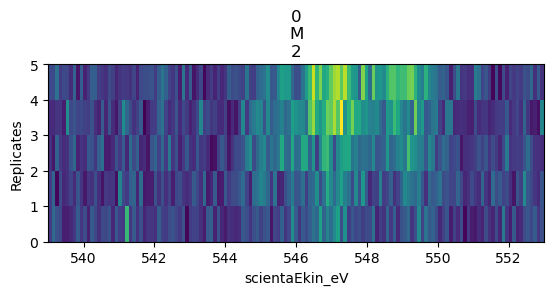

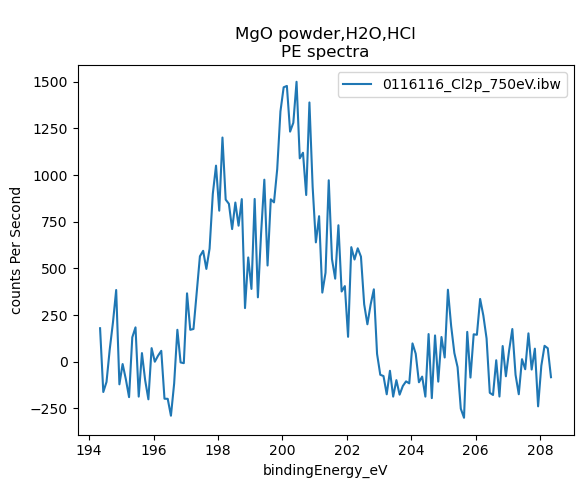

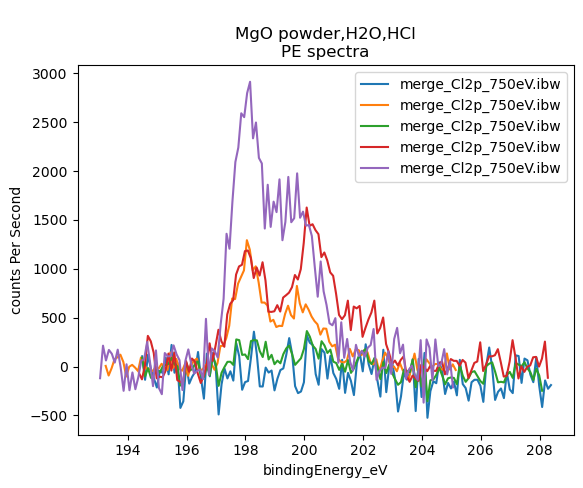

In [4]:
dataframe['image'][0].shape

name_filter = (dataframe['name'] == '0116116_Cl2p_750eV.ibw').to_numpy()
date_filter = np.array(['Jun-2023' in date for date in dataframe['lastModifiedDatestr']])

filter = np.logical_and(name_filter.flatten(),date_filter.flatten()) 

napp.plot_image(dataframe,filter)
napp.plot_spectra(dataframe,filter)

name_filter = np.array(['merge' in name for name in dataframe['name'] ])
date_filter = np.array(['Jun-2023' in date for date in dataframe['lastModifiedDatestr']])
filter = np.logical_and(name_filter.flatten(),date_filter.flatten()) 


napp.plot_spectra(dataframe,filter)

